# Lab 7b: Estimating Parameters for Single Asset Geometric Brownian Motion (GBM) models
[Geometric Brownian motion (GBM)](https://en.wikipedia.org/wiki/Geometric_Brownian_motion) is a continuous-time stochastic process model in which the random variable $S(t)$, e.g., the share price of `XYZ` is described by a deterministic drift corrupted by a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process):

$$\frac{dS}{S} = {\mu}dt + \sigma{dW}$$

The constant $\mu$ denotes a drift parameter, $\sigma$ indicates a volatility parameter, and $dW$ represents the output of a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process).  Using [Ito's lemma](https://en.wikipedia.org/wiki/Itô%27s_lemma), we can formulate an analytical solution to the GBM equation:

$$S(t) = S_{\circ}\exp\Biggl[\left(\mu-\frac{\sigma^{2}}{2}\right)\left(t - t_{\circ}\right) + (\sigma\sqrt{t-t_{\circ}})\cdot{Z_{t}(0,1)}\Biggr]$$

where $S_{\circ}$ denotes the share price at $t_{\circ}$, and $Z_{t}(0,1)$ denotes a [standard normal random variable](https://en.wikipedia.org/wiki/Normal_distribution#Standard_normal_distribution) at time $t$.

## Learning Objectives
The goal of `Lab 7b` is to help students become acquainted with using single-asset geometric Brownian motion (GBM) models. Specifically, we will use historical data to estimate the drift parameters $\mu$ and $\sigma$  in the GBM analytical solution. We'll compare the model's share price predictions for different periods to actual market values (in-sample).

### Tasks

* __Prerequisite__ (duration 5 min): Break up into teams and familiarize yourself with the lab, its setup, packages, types, functions, etc. Execute the `include("Include.jl")` command and load the data. Report back to the class any questions that your group has.
* __Task 1__ (duration 15 min): Estimate the $\mu$-parameter for each firm in the dataset. Make sure you understand the logic of how this parameter is calculated. Report back your questions.
* __Task 2__ (duration 20 min): Estimate the $\sigma$-parameter for each firm in the dataset. Make sure you understand how the $\sigma$-parameter is calculated. Report back your questions.
* __Conceptual questions__: In addition to the technical tasks, please answer the conceptual questions associated with each task or subtask.

Let's start lecture `L7c` with the last task:

* __Task 3__ (duration 10 min): Pick a random firm, a random period, simulate the share price, and compare the simulation with the observed price.
    * `TODO` Build an instance of the `MyGeometricBrownianMotionEquityModel` model, inspect the fields, and ensure you understand them. 
    * `TODO` Sample the `MyGeometricBrownianMotionEquityModel` using the `sample(...)` function, and compute the `expectation` and `variance` using the analytical GBM expressions.

## Setup
We set up the computational environment by including the `Include.jl` file. The `Include.jl` file loads external packages, various functions that we will use in the exercise, and custom types to model the components of our example problem.

In [1]:
include("Include.jl");

    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
   Resolving package versions...
  No Changes to `~/Desktop/julia_work/CHEME-5660-Labs-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Labs-F23/Manifest.toml`
Precompiling project...
  ✓ Clustering
  ✓ StatsPlots
  2 dependencies successfully precompiled in 6 seconds. 245 already precompiled.
  Activating project at `~/Desktop/julia_work/CHEME-5660-Labs-F23`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Labs-F23/Project.toml`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Labs-F23/Manifest.toml`
    Updating registry at `~/.julia/registries/General.toml`
    Updating git-repo `https://github.com/varnerlab/VLQuantitativeFinancePackage.jl.git`
  No Changes to `~/Desktop/julia_work/CHEME-5660-Labs-F23/Project.toml`
    Updating `~/Desktop/julia_work/CHEME-5660-Labs-F23/Manifest.toml`
  [aaaa29a8] ↑ Clustering v0.15.4 ⇒ v0.15.5
  [b4f34e82] ↑ Distances v0.10.9 ⇒ v0.10.10
  [9001

### Packages
The `Include.jl` file loads several packages that we use'll for our exercises:
* [Dates.jl](https://docs.julialang.org/en/v1/stdlib/Dates/#Dates)  is a package included with the standard library which provides basic functionality for working dates.
* [DataFrames.jl](https://dataframes.juliadata.org/stable/) and [CSV.jl](https://github.com/JuliaData/CSV.jl) provide a set of tools for working with tabular data in [Julia](https://julialang.org). Its design and functionality are similar to those of [Pandas (in Python)](https://pandas.pydata.org) and [data.frame, data.table and dplyr (in R)](https://dplyr.tidyverse.org), making it an excellent general-purpose data science tool.
* [Distributions.jl](https://github.com/JuliaStats/Distributions.jl) is a [Julia](https://julialang.org) package for probability distributions and associated functions.
* [PrettyTables.jl](https://ronisbr.github.io/PrettyTables.jl/stable/man/html_backend/) is a [Julia](https://julialang.org) package that implements functions to construct and display text-based tables
* [Plots.jl](https://docs.juliaplots.org/stable/) is a plotting library, and [Colors.jl](https://github.com/JuliaGraphics/Colors.jl) is a color library that we'll use for data visualization in [Julia](https://julialang.org).
* [LinearAlgebra.jl](https://github.com/JuliaLang/LinearAlgebra.jl) is a package that provides functionality for working with linear algebra in [Julia](https://julialang.org).
* [Statistics.jl](https://docs.julialang.org/en/v1/stdlib/Statistics/#Statistics) is a package included with the standard library module, which contains basic statistics functionality

### Types
`Include.jl` loads some [problem-specific types](https://docs.julialang.org/en/v1/manual/types/#Composite-Types) that will be helpful for the geometric Brownian motion simulation of equity share prices.

The mutable struct `MyGeometricBrownianMotionEquityModel`, which holds the parameters associated with the geometric Brownian motion simulation, has two fields:
* The `μ::Float64` field holds the drift or growth parameter for the model
* The `σ::Float64` field holds the volatility parameter for the model

### Functions
The `Include.jl` file also loads the following [Julia functions](https://docs.julialang.org/en/v1/manual/functions/):

`function loaddatafile(; firm::Int = 1, year::String = "Year-1") -> DataFrame` 
 > The `loaddatafile(...)` function, which load historical share price data, takes an [Int](https://docs.julialang.org/en/v1/manual/integers-and-floating-point-numbers/#Integers) that encodes a `firm index` and a [String](https://docs.julialang.org/en/v1/manual/strings/) argument that holds the `year` parameter of the dataset. The historical share price data is returned to the caller as a [DataFrame](https://dataframes.juliadata.org/stable/) with the fields: `volume`,`volume_weighted_average_price`,`open`,`close`,`high`, and `low,number_of_transactions`.

`function generate_firm_index_set() -> Set{Int64}`
> The `generate_firm_index_set()` function generates the set of `firm_id` values for which we have data files for all the years of this study, i.e., `Year-1,..., Year-5`. 

`function build(model::Type{MyGeometricBrownianMotionEquityModel}, data::NamedTuple) -> MyGeometricBrownianMotionEquityModel` 
> The `build)(...)` function takes information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument (the $(\mu, \sigma)$ values) and returns an instance of the `MyGeometricBrownianMotionEquityModel` [mutable type](https://docs.julialang.org/en/v1/manual/types/#Mutable-Composite-Types). 

`function sample(model::MyGeometricBrownianMotionEquityModel, data::NamedTuple; number_of_paths::Int64 = 100) -> Array{Float64,2}`
> The `sample(...)` function takes a `MyGeometricBrownianMotionEquityModel` instance, and information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument and solves the geometric Brownian motion model for `number_of_paths` (default: 100) trials. The `data` argument holds the initial share price `Sₒ::Float64`, the initial and final times for the simulation `T₁` and `T₂` respectively (both are `Float64` types), and the simulation time step `Δt::Float64`.

`function 𝔼(model::MyGeometricBrownianMotionEquityModel, data::NamedTuple) -> Array{Float64,2}`
> The `𝔼(...)` functions takes a `MyGeometricBrownianMotionEquityModel` instance and information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument and computes the expectation of the share price as a function of time. The expectation is returned as a `T`$\times$`2` array where the first column holds the time values while the second column holds the expected share price. The `data` argument holds the initial share price `Sₒ::Float64`, the initial and final times for the simulation `T₁` and `T₂` respectively (both are `Float64` types), and the simulation time step `Δt::Float64`.

`function Var(model::MyGeometricBrownianMotionEquityModel, data::NamedTuple) -> Array{Float64,2}`
> The `Var(...)` function takes a `MyGeometricBrownianMotionEquityModel` instance and information in the `data` [NamedTuple](https://docs.julialang.org/en/v1/base/base/#Core.NamedTuple) argument and computes the variance of the share price as a function of time. The variance is returned as a `T`$\times$`2` array where the first column holds the time values while the second column holds the share price variance. The `data` argument holds the initial share price `Sₒ::Float64`, the initial and final times for the simulation `T₁` and `T₂` respectively (both are `Float64` types), and the simulation time step `Δt::Float64`.

### Constants
Finally, we set some constant values that are used throughtout the study. In particular, the value of $\Delta{t}$ holds the time step that we'll use (see below for a discussion of the value), and we'll specify the number of trading days to simulate in the `T` variable:

In [2]:
Δt = (1.0/252.0);
T = 48;
number_of_trading_days = 1256;
all_range = range(1,stop=number_of_trading_days,step=1) |> collect;

## Prerequisite: Load historical equity dataset
We gathered a daily open-high-low-close `dataset` for each firm in the [S&P500](https://en.wikipedia.org/wiki/S%26P_500) for the past five-trading years (a maximum of `1256` data points per firm). We will exclude firms that do not have the maximum number of trading days from the `dataset`. 

We load the price `dataset` by calling the `MyPortfolioDataSet()` function. This returns the `dataset` variable, which is type `Dict{Int64,DataFrame}`

In [3]:
dataset = MyPortfolioDataSet() |> x-> x["dataset"];

In [4]:
dataset

Dict{Int64, DataFrame} with 458 entries:
  56  => 1256×7 DataFrame…
  35  => 1256×7 DataFrame…
  425 => 1256×7 DataFrame…
  429 => 1256×7 DataFrame…
  308 => 1256×7 DataFrame…
  67  => 1256×7 DataFrame…
  215 => 1256×7 DataFrame…
  319 => 1256×7 DataFrame…
  251 => 1256×7 DataFrame…
  112 => 1256×7 DataFrame…
  185 => 1256×7 DataFrame…
  348 => 1256×7 DataFrame…
  420 => 1256×7 DataFrame…
  404 => 1256×7 DataFrame…
  365 => 1256×7 DataFrame…
  417 => 1256×7 DataFrame…
  333 => 1256×7 DataFrame…
  86  => 1256×7 DataFrame…
  168 => 1256×7 DataFrame…
  431 => 1256×7 DataFrame…
  207 => 1256×7 DataFrame…
  263 => 1256×7 DataFrame…
  422 => 1256×7 DataFrame…
  242 => 1256×7 DataFrame…
  183 => 1256×7 DataFrame…
  ⋮   => ⋮

The all keys array holds the list of firm indexes in the dataset that have complete data, i.e., contain all `1256` data values: 

In [5]:
list_of_all_firms = keys(dataset) |> collect |> sort;

## Task 1: Estimate the $\mu$ parameter
Let $\mathbf{A}$ denote a $\mathcal{S}\times{2}$ matrix, where each row corresponds to a time value. The first column of $\mathbf{A}$ is all 1's while the second column holds the $(t_{k}-t_{\circ})$ values. Further, let $\mathbf{Y}$ denote the `ln` of the price values of `firm_id` (in the same order as the $\mathbf{A}$ matrix). Then, the y-intercept and slope (drift parameter) can be estimated by solving the `overdetermined` system of equations:

$$\mathbf{A}\mathbf{\theta} + \mathbf{\epsilon} = \mathbf{Y}$$

where $\mathbf{\theta}$ denotes the vector of unknown parameters. This system can be solved as:

$$\mathbf{\theta} = (\mathbf{A}^{T}\mathbf{A})^{-1}\mathbf{A}^{T}\mathbf{Y} - (\mathbf{A}^{T}\mathbf{A})^{-1}\mathbf{A}^{T}\mathbf{\epsilon}$$

where $\mathbf{A}^{T}$ denotes the transpose of the matrix $\mathbf{A}$, and $(\mathbf{A}^{T}\mathbf{A})^{-1}$ denotes the inverse of the square matrix product $\mathbf{A}^{T}\mathbf{A}$. Finally, we can estimate the error term $\mathbf{\epsilon}$ by calculating the residuals:

$$\mathbf{\epsilon} = \mathbf{Y} - \mathbf{A}\mathbf{\theta}$$

and fitting a normal distribution to the residuals to compute the uncertainty in the estimate of the mean of the drift parameter $\hat{\mu}$. Initially, let's neglect modeling the residuals $\mathbf{\epsilon}$ and consider only the mean solution:

In [6]:
μ̂_dictionary = Dict{Int64,Float64}();
for i ∈ eachindex(list_of_all_firms)
    
    firm_index = list_of_all_firms[i];
    firm_data = dataset[firm_index];
    T_all = all_range*Δt .- Δt;
    
    A = [ones(number_of_trading_days) T_all];
    Y = log.(firm_data[!,:volume_weighted_average_price]);

    # Solve the normal equations -
    θ = inv(transpose(A)*A)*transpose(A)*Y;

    # get estimated μ -
    μ̂_dictionary[firm_index] = θ[2];
end
μ̂_dictionary;

### Discussion
#### Q1.1: Calculate and plot the distribution of residuals for a random firm. What would we expect this to look like? Why? Does this roughly match what we're expecting?

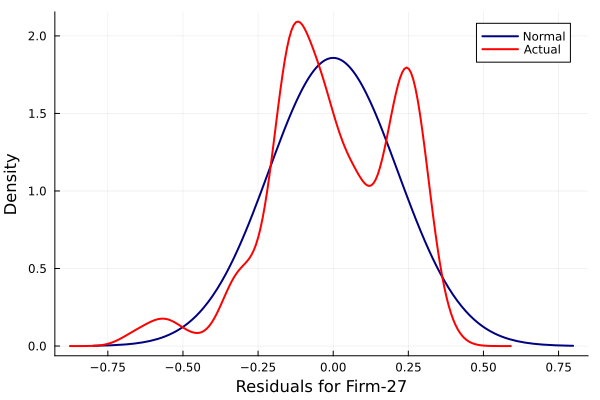

In [7]:
rand_firm_index = rand(list_of_all_firms)
firm_data = dataset[rand_firm_index]
T_all = all_range*Δt .- Δt;
A = [ones(number_of_trading_days) T_all];
Y = log.(firm_data[!,:volume_weighted_average_price]);
θ = inv(transpose(A)*A)*transpose(A)*Y;

ϵ = Y .- A*θ
ϵₙ = fit_mle(Normal,ϵ);

plot(ϵₙ, label="Normal", c=:navyblue,lw=2)
density!(ϵ, normalize=true, xlabel="Residuals for Firm-$(rand_firm_index)", 
    ylabel="Density", label="Actual", c=:red,lw=2)

## Task 2: Estimate the $\sigma$ parameter
There are multiple methods to calculate the volatility parameter $\sigma$. Generally, these approaches can be classified into two categories - historical volatility estimates based on return data and future volatility estimates based on the [Implied Volatility (IV)](https://en.wikipedia.org/wiki/Implied_volatility) of [put and call options contracts](https://en.wikipedia.org/wiki/Option_(finance)). For now, let's focus on computing the volatility $\sigma$ from historical data and talk about options later.

#### Historical volatility
The historical volatility is estimated by analyzing the distribution of returns. To do this, let's assume a share price model of the form:

$$
S_{j} = \exp\left(\mu_{j,j-1}\Delta{t}\right)\cdot{S_{j-1}}
$$

where $\mu_{j,j-1}$ denotes the _growth rate_ (units: 1/time) and $\Delta{t}$ (units: time) denotes the time step during the period $(j-1)\rightarrow{j}$. Solving for the return parameter $\mu_{j,j-1}$ gives the expression:

$$
\mu_{j,j-1} = \left(\frac{1}{\Delta{t}}\right)\cdot\ln\left(\frac{S_{j}}{S_{j-1}}\right)
$$

We use daily data; thus, the natural time frame between $S_{j-1}$ and $S_{j}$ is a single day. However, subsequently, it will be easier to use an annualized value for the $\mu$ parameter; thus, we let $\Delta{t} = 1/365$, or $\Delta{t} = 1/252$, i.e., the fraction of a calendar or trading year that occurs in a single day (specified above).

##### Implementation
We will process each firm in the `dataset` using a `for` loop. For each iteration of the loop, we:
* We define the `σ̂_dictionary = Dict{Int64, Float64}()`, which holds our estimates of the volatility parameter.
* Next, for index `i`, we select a `firm_index` and `firm_data`, and compute the `growth_rate_array` for the firm. 
* We define an array that holds the values for $\mu_{j,j-1}$, named `growth_rate_array`. We then populate the `growth_rate_array` using a `for` loop; during each pass through the loop, we get values for $S_{j-1}$ and $S_{j}$, i.e., the VWAP for the two days from the dataset `firm_data`, and then compute (and store) the annualized value of $\mu_{j,j-1}$ parameter in the `growth_rate_array`.
* Finally, we approximate the historical volatility parameter $\sigma$ from the variance of the returns computed from the historical data set. In particular, we fit the return data to a `Normal` distribution using [maximum likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation) and then computed an estimate of the __annualized historical volatility__ as $\sqrt{252}\cdot\hat{\sigma}$. We access the variance using the `params(...)` function from the [Distributions.jl](https://github.com/JuliaStats/Distributions.jl.git) package.

In [8]:
σ̂_dictionary = Dict{Int64,Float64}();
for i ∈ eachindex(list_of_all_firms)
    
    firm_index = list_of_all_firms[i];
    firm_data = dataset[firm_index];

    growth_rate_array = Array{Float64,1}(undef, number_of_trading_days-1)
    for j ∈ 2:number_of_trading_days
    
        S₁ = firm_data[j-1, :volume_weighted_average_price];
        S₂ = firm_data[j, :volume_weighted_average_price];
        growth_rate_array[j-1] = (1/Δt)*log(S₂/S₁);
    end
    
    R = growth_rate_array.*Δt;
    nd = fit_mle(Normal, R);
    σ̂_dictionary[firm_index] = params(nd) |> last |> x-> *(x, sqrt(252));
end
σ̂_dictionary;

In [9]:
σ̂_dictionary[11] #AMD

0.46876667886675705

### Discussion
#### Q2.1: How can we validate our estimate of the volatility?
#### Q2.2: We fit a normal, and grabbed the standard deviation. What do you think about this?

### Aside: Let's save the estimated drift and volatility parameters

In [20]:
firm_mapping_df = MyFirmMappingDataSet()
parameters_df = DataFrame();
for i ∈ eachindex(list_of_all_firms)
    
    firm_index = list_of_all_firms[i];
    firm_ticker = firm_mapping_df[firm_index, :Symbol];
    μ̂ = μ̂_dictionary[firm_index]
    σ̂ = σ̂_dictionary[firm_index]
    
    data_tuple = (
        index = firm_index, 
        ticker = firm_ticker,
        drift =  μ̂,
        volatility = σ̂
    );
    
    push!(parameters_df, data_tuple)
end

In [23]:
CSV.write(joinpath(_PATH_TO_DATA,"Parameters-SP500-2018-2022.csv"), parameters_df);

"/Users/jeffreyvarner/Desktop/julia_work/CHEME-5660-Labs-F23/data/Parameters-SP500-2018-2022.csv"

## Task 3: Visualize the simulation of a random firm for a random time period
Let's begin by selecting a `random_firm_index` from our list of firms, and get its associated data, store this in the `random_firm_data` variable:

In [11]:
random_firm_index = keys(dataset) |> collect |> rand;
random_firm_data = dataset[random_firm_index];
println("The (randomly) selected firm in this study: $(random_firm_index)")

The (randomly) selected firm in this study: 120


Next, let's randomly choose a contiguous time window of `T` days (also specified above) and analyze the model’s performance during this period. To begin, we will generate the `start_index` variable, i.e., the trading index to start the simulation from. The `stop_index` will then be determined by adding the number of trading days `T` to the `start_index`:

In [12]:
start_index = rand(1:(number_of_trading_days - T - 1))
stop_index = start_index + T
println("Visualize Firm-$(random_firm_index) between trading days ($(start_index) -> $(stop_index))")

Visualize Firm-120 between trading days (543 -> 591)


Get the $(\hat{\mu},\hat{\sigma})$ values from the respective dictionaries for the `random_firm_index`:

In [13]:
μ̂ = μ̂_dictionary[random_firm_index];
σ̂ = σ̂_dictionary[random_firm_index];
println("Firm-$(random_firm_index) has (μ̂,σ̂) = ($(μ̂),$(σ̂))")

Firm-120 has (μ̂,σ̂) = (-0.0011875695538827763,0.2774535241349082)


Finally, let's create a geometric Brownian motion model, using the `build(…)` function and then solve it between `T₁` and `T₂` starting with price `Sₒ` using the `solve(…)` function. 
* In addition to the analytical values of the expectation and the variance, our simulation generates `N = 100` sample paths using the `sample(...)` function, where the resulting price values are saved in the `X` array. This array will be a `T`$\times$`N+1` array,  each row corresponds to a time value, while each column (after the first) is a solution:

In [14]:
model = build(MyGeometricBrownianMotionEquityModel, (
            μ = μ̂, σ = σ̂ ));

Sₒ = random_firm_data[start_index,:volume_weighted_average_price];
T₁ = start_index*Δt
T₂ = stop_index*Δt
X = sample(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt), 
    number_of_paths = 100);

For Geometric Brownian Motion (GBM) analytical expressions are available for both the expected value and the variance of the share price. The expected share price is given by:

$$\mathbb{E}\left(S_{t}\right) = S_{o}\exp\left(\mu\cdot\Delta{t}\right)$$

where $\Delta{t} = t-t_{o}$ and $S_{o}$ denotes the share price at $t=t_{o}$. On the other hand the variance of the share price $\text{Var}(S_{t})$ at time $t$ is given by:

$$\text{Var}\left(S_{t}\right) = S_{\circ}^{2}e^{2\mu\cdot\Delta{t}}\left[e^{\sigma^{2}{\Delta{t}}} - 1\right]$$

We've implmented the analytical expectation and variance calculations in the `𝔼(...)` and `Var(...)` functions:

In [15]:
expectation = 𝔼(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt));
variance = Var(model, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt));

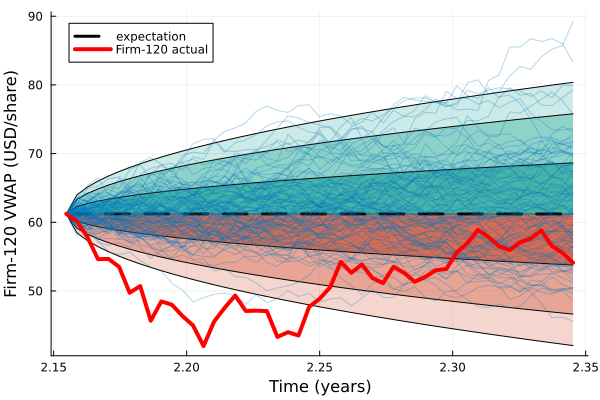

In [16]:
let
    L68 = expectation[:,2] .- sqrt.(variance[:,2])
    U68 = expectation[:,2] .+ sqrt.(variance[:,2])
    L95 = expectation[:,2] .- 1.96*sqrt.(variance[:,2])
    U95 = expectation[:,2] .+ 1.96*sqrt.(variance[:,2])
    L99 = expectation[:,2] .- 2.576*sqrt.(variance[:,2])
    U99 = expectation[:,2] .+ 2.576*sqrt.(variance[:,2])


    plot(expectation[:,1], expectation[:,2], fillrange=L68, c=colors[5], alpha=0.5, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=U68, c=colors[6], alpha=0.5, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=L95, c=colors[5], alpha=0.3, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=U95, c=colors[6], alpha=0.3, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=L99, c=colors[5], alpha=0.2, label="")
    plot!(expectation[:,1], expectation[:,2], fillrange=U99, c=colors[6], alpha=0.2, label="")

    plot!(expectation[:,1], expectation[:,2],c=:black, lw=3,ls=:dash, label="expectation")
    plot!(expectation[:,1], L68, c=:black, lw=1, label="")
    plot!(expectation[:,1], U68, c=:black, lw=1, label="")
    plot!(expectation[:,1], L95, c=:black, lw=1, label="")
    plot!(expectation[:,1], U95, c=:black, lw=1, label="")
    plot!(expectation[:,1], L99, c=:black, lw=1, label="")
    plot!(expectation[:,1], U99, c=:black, lw=1, label="")
    plot!(X[:,1],X[:,2:end], label="", c=colors[2], alpha=0.3)
    plot!(X[:,1], random_firm_data[start_index:stop_index, :volume_weighted_average_price], lw=4, c=:red, 
        label="Firm-$(random_firm_index) actual")

    xlabel!("Time (years)", fontsize=18)
    ylabel!("Firm-$(random_firm_index) VWAP (USD/share)", fontsize=18)
end

### Was this a successful simulation?
Determining if a model accurately represents data can be done in various ways, but we will utilize a straightforward functional test. This test involves checking if the simulated price falls within a specified lower bound ($L_{j}$) and upper bound ($U_{j}$) for all times $t_j$ within a given interval ($t_{j}\in\mathcal{I}_{k}$). 

* If the simulation meets this requirement, it is deemed a `success`. The values for $L_{j}$ and $U_{j}$ can be customized, but we set these to $\mu\pm{2.576}\cdot{\sigma}$, where $\mu$ represents the expected value and $\sigma$ is the standard deviation of the geometric Brownian motion simulation. 
* However, if the actual price exceeds the given bounds at any point, the simulation is considered a `failure`.

In [17]:
L = expectation[:,2] .- 2.576*sqrt.(variance[:,2])
U = expectation[:,2] .+ 2.576*sqrt.(variance[:,2])
   
# check the bounds: if below L, or above U then simulation failed
success_flag = true;
for k ∈ 1:T
    if (random_firm_data[start_index+k-1,:volume_weighted_average_price] < L[k]) || (random_firm_data[start_index+k-1,:volume_weighted_average_price] > U[k])
        success_flag = false;
        break;
    end
end

println("The simultion of the VWAP of Firm-$(random_firm_index) between ($(start_index) -> $(stop_index)) was successful: $(success_flag)")

The simultion of the VWAP of Firm-120 between (543 -> 591) was successful: false


#### Discussion
##### Q3.1: Think about the time period that was used to estimate these parameters (past five years). How do you think the simulation results would change if only the more recent data were used? What are some reasons why we would/would not want to make this change?

fill me in

#### Discussion
##### Q3.2: Mess around with different values of $(\hat{\mu},\hat{\sigma})$ and observe the effects on the simulated paths. What do you notice with larger/smaller values of $\hat{\mu}$? What about $\hat{\sigma}$? What would have to happen to the underlying share price series to observe these different $(\hat{\mu},\hat{\sigma})$?

New values of (μ̂,σ̂) = (-0.0023751391077655526,0.5549070482698164)


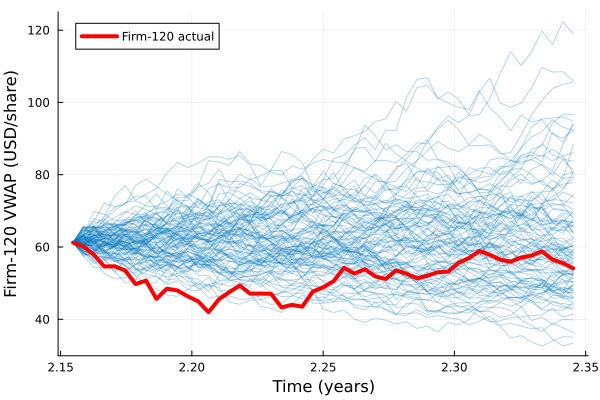

In [18]:
μ̂_factor = 2.0 # FILL ME IN
σ̂_factor = 2.0 # FILL ME IN
μ̂_2 = μ̂ * μ̂_factor
σ̂_2 = σ̂ * σ̂_factor
println("New values of (μ̂,σ̂) = ($(μ̂_2),$(σ̂_2))")

model_2 = build(MyGeometricBrownianMotionEquityModel, (
            μ = μ̂_2, σ = σ̂_2 ));

Sₒ = random_firm_data[start_index,:volume_weighted_average_price];
T₁ = start_index*Δt
T₂ = stop_index*Δt
X_2 = sample(model_2, (Sₒ = Sₒ, T₁ = T₁, T₂ = T₂, Δt = Δt), 
    number_of_paths = 100);

plot(X_2[:,1],X_2[:,2:end], label="", c=colors[2], alpha=0.3)
plot!(X_2[:,1], random_firm_data[start_index:stop_index, :volume_weighted_average_price], lw=4, c=:red, 
    label="Firm-$(random_firm_index) actual")

xlabel!("Time (years)", fontsize=18)
ylabel!("Firm-$(random_firm_index) VWAP (USD/share)", fontsize=18)